# Weight Initialization

## Our test model for this practical task

In [19]:
# Use the below functionality to execute your model (that you will adjust later step by step)
# This block of code provides you the functionality to train a model. Results are printed after each epoch

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import tqdm


def load_mnist_data(root_path='./data', batch_size=4):
    """
    Loads MNIST dataset into your directory.
    You can change the root_path to point to a already existing path if you want to safe a little bit of memory :)
    """
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))]
    )

    trainset = torchvision.datasets.MNIST(root=root_path, train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root=root_path, train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader, testloader


def train_model(model, batch_size: int = 4, epochs: int = 10):
    # we only consider the mnist train data for this example
    train_loader, _ = load_mnist_data(root_path='./data', batch_size=batch_size)

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    model = model.to(device=device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    iterations = 0
    for epoch in range(epochs):
        running_loss = 0.0
        running_accuracy = []
        for imgs, targets in tqdm.tqdm(train_loader, desc=f'Training iteration {epoch + 1}'):
            iterations += 1
            imgs, targets = imgs.to(device=device), targets.to(device=device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(imgs.reshape(imgs.shape[0], -1))

            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()

            # Calculate the Accuracy (how many of all samples are correctly classified?)
            max_outputs = torch.max(outputs, dim=1).indices
            accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
            running_accuracy.append(accuracy)
    
        print(f'Epoch {epoch + 1} finished with loss: {running_loss / len(train_loader):.3f} and accuracy {torch.tensor(running_accuracy).mean():.3f}')

## Training progress with different weight settings

In [20]:
# You can use this model for your tests (of course you can change the architecture a little, but it should not be necessary.)
import torch
import torch.nn as nn


model = nn.Sequential(
    nn.Linear(784, 32),  # input layer (do not change the in_features size of this layer - we need it later)
    nn.Linear(32, 32),
    nn.Linear(32, 10)  # you can change the in_features of this layer but let the out_features at size 10 here - we need it layer
)


print(model)

Sequential(
  (0): Linear(in_features=784, out_features=32, bias=True)
  (1): Linear(in_features=32, out_features=32, bias=True)
  (2): Linear(in_features=32, out_features=10, bias=True)
)


### Weight settings

In [21]:
# Find out how to change the weights of the layers from your neural network.
# ATTTENTION: Write your code inside the "with torch.no_grad():" section! This is necessary for changing the weights of the layers

#### Zero weights

In [22]:
# Set all weights and biases of your network to zero

with torch.no_grad():
    for m in model.modules():
        if isinstance(m, nn.Linear):
            m.weight.zero_()
            m.bias.zero_()

In [23]:
# Train the network with your new settings and take a look at the results
# Run the model training
train_model(model=model, batch_size=4, epochs=3)

# What can you observe?

'''it is difficult to provide an accurate observation.
However, we initialized all weights and biases to zero, 
probably the model would not learn effectively or even it did not learn anything at all. 
Every epocs our results are same'''

Training iteration 1: 100%|██████████| 15000/15000 [00:57<00:00, 259.93it/s]


Epoch 1 finished with loss: 2.302 and accuracy 0.112


Training iteration 2: 100%|██████████| 15000/15000 [00:47<00:00, 314.42it/s]


Epoch 2 finished with loss: 2.301 and accuracy 0.112


Training iteration 3: 100%|██████████| 15000/15000 [00:48<00:00, 306.58it/s]

Epoch 3 finished with loss: 2.301 and accuracy 0.112


'it is difficult to provide an accurate observation.\nHowever, we initialized all weights and biases to zero, \nprobably the model would not learn effectively or even it did not learn anything at all. \nEvery epocs our results are same'

#### Constant weights

In [24]:
# Set all weights and biases to constant numbers (e.g. 0.5)
# How does the training progress?

with torch.no_grad():
    for m in model.modules():
        if isinstance(m, nn.Linear):
            m.weight.fill_(0.5)
            m.bias.fill_(0.5)

    

In [25]:
# Train the network with your new settings and take a look at the results
# Run the model training
train_model(model=model, batch_size=4, epochs=3)

# What can you observe?
'''This time backpropagation probably worked and second epoc's result is better than first one,
 so the model can manage to learn with some weights and biases'''


Training iteration 1: 100%|██████████| 15000/15000 [01:05<00:00, 229.66it/s]


Epoch 1 finished with loss: 170.640 and accuracy 0.141


Training iteration 2: 100%|██████████| 15000/15000 [01:01<00:00, 244.85it/s]


Epoch 2 finished with loss: 2.258 and accuracy 0.158


Training iteration 3: 100%|██████████| 15000/15000 [01:24<00:00, 178.54it/s]

Epoch 3 finished with loss: 2.247 and accuracy 0.163


"This time backpropagation probably worked and second epoc's result is better than first one,\n so the model can manage to learn with some weights and biases"

In [29]:
# Let us also take a look at the gradient of the output layer
# Access the gradients at the output layer of your model and analyze them

# We first input some random values
# forward + backward
outputs = model(torch.randn(size=(1,784)))
loss = nn.CrossEntropyLoss()(outputs, torch.tensor([1]))
loss.backward()


# Code here
#acces the gradients at the output layer of our model:
# for name, param in model.named_parameters():
#     if 'weight' in name:
#         print(f"Gradient of {name}: {param.grad}")

print(model[-1].weight.grad)  
print(model[-1].bias.grad) 



# What can you observe?
# What we can observe is, that the model changes the weight always the same amount making it unable to learn.

tensor([[ 0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,
          0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,
          0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,
          0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965,  0.5965],
        [-2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380,
         -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380,
         -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380,
         -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380, -2.0380],
        [ 0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,
          0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,
          0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,
          0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267,  0.2267],
        [ 0.1081,  0.1081

#### Unusual weights

In [52]:
# Set some weights (around 50%) of every model of the model to some weird value, e. g. extremely high (> 10.0) or extremely low (< 1e-7).
# How does the training progress? 
# Can your model also diverge instead of converge because the weights were way to high or low?


with torch.no_grad():
    for layer in model:
        if isinstance(layer, nn.Linear):
            size = layer.weight.size()
            print(size)
            half_size = size[1] // 2
            print(half_size)
            layer.weight[:, :half_size].fill_(10.0)  # Set half of the weights to 10.0
            layer.weight[:, half_size:].fill_(1e-7)   # Set the other half of the weights to 1e-7




torch.Size([32, 784])
392
torch.Size([32, 32])
16
torch.Size([10, 32])
16


In [53]:
# Train the network with your new settings and take a look at the results
# Run the model training
train_model(model=model, batch_size=4, epochs=5)

# What can you observe?

'''with this resukt , the model is not learning and the training process is not converging.
we couldnt calculate loss function probably because of extremly high weight initialization.
the constant accuracy always same so it means our model is not learning. 
'''

Training iteration 1: 100%|██████████| 15000/15000 [00:58<00:00, 256.15it/s]


Epoch 1 finished with loss: nan and accuracy 0.099


Training iteration 2: 100%|██████████| 15000/15000 [01:01<00:00, 244.00it/s]


Epoch 2 finished with loss: nan and accuracy 0.099


Training iteration 3: 100%|██████████| 15000/15000 [00:57<00:00, 262.42it/s]


Epoch 3 finished with loss: nan and accuracy 0.099


Training iteration 4: 100%|██████████| 15000/15000 [01:01<00:00, 245.38it/s]


Epoch 4 finished with loss: nan and accuracy 0.099


Training iteration 5: 100%|██████████| 15000/15000 [00:59<00:00, 251.02it/s]

Epoch 5 finished with loss: nan and accuracy 0.099


## Weight initialization techniques

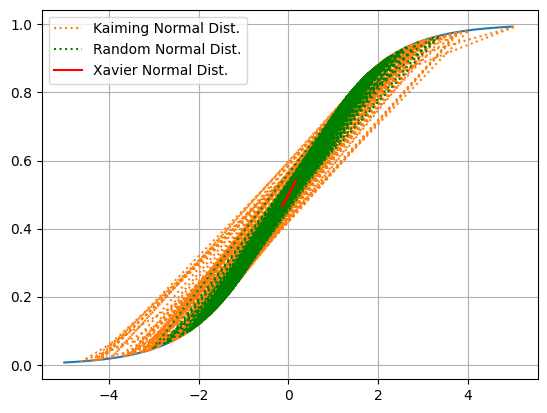

"\nThe goal of Xavier Initialization is to initialize the weights such that \nthe variance of the activations are the same across every layer.\n This constant variance helps prevent the gradient from exploding or vanishing.\n\n Xavier ensures more balanced model every layer. They say it's commenly used with sigmoid function because of \n vanishing gradient problem.\n\n"

In [111]:
# We now take a closer look to the sigmoid activation function.
# Where does the sigmoid function creates small gradients and where are the biggest gradient?

'''

for large positive value, leading to a sigmoid output close to 1.
for extremly small values (negative values maybe), resulting in a sigmoid output close to 0.


'''

# Now lets plot some different activation function methods
# Use matplotlib and plot the sigmoid activation function into the plot.
# Create 1000 sample points from x-values [-5.0, 5.0] and create y = Sigmoid(x) and plot the result. (The result should simply be the sigmoid curve)
# You can use the Sigmoid function from PyTorch here!

import matplotlib.pyplot as plt

# Code here

def sigmoid(x):
    return 1 / (1+torch.exp(-x))

x = torch.linspace(-5.0,5.0,1000)
y = sigmoid(x)


plt.plot(x,y)
plt.grid(True)




# Now lets plot the kaiming normal weight initialization into the plot
# Create 1000 points (x) sampled from the kaiming_normal_ (pytorch function) and create y = Sigmoid(kaiming_normal(1000)) and plot the result into the same plot as before.
# Use a different color for plotting the results


# Code here


w = torch.empty(1000,1)

x_kaiming = torch.nn.init.kaiming_normal_(w)
y_kaiming = sigmoid(x_kaiming)

plt.plot(x_kaiming,y_kaiming, ':', label ='Kaiming Normal Dist.')
plt.grid(True)




# Now lets plot a random normal (torch.randn) weight initialization into the plot
# Create 1000 points (x) sampled from the randn (pytorch function) and create y = Sigmoid(randn(1000)) and plot the result into the same plot as before.
# Use a different color for plotting the results


x_randn = torch.randn(1000)

y_randn = sigmoid(x_randn)

plt.plot(x_randn, y_randn, 'g:', label='Random Normal Dist.')
plt.grid(True)




# Now lets plot a xavier_normal weight initialization into the plot
# Create 1000 points (x) sampled from the xavier_normal_ (pytorch function) and create y = Sigmoid(xavier_normal_(1000)) and plot the result into the same plot as before.
# Use a different color for plotting the results


x = torch.empty(1000,1)

x_xavier = torch.nn.init.xavier_normal_(x)
y_xavier = sigmoid(x)

plt.plot(x_xavier, y_xavier, 'r', label='Xavier Normal Dist.')


plt.grid(True)
plt.legend()
plt.show()


# Which weight initialization technique is best when using sigmoid activation function?

'''
The goal of Xavier Initialization is to initialize the weights such that 
the variance of the activations are the same across every layer.
 This constant variance helps prevent the gradient from exploding or vanishing.

 Xavier ensures more balanced model every layer. They say it's commenly used with sigmoid function because of 
 vanishing gradient problem.

'''



## Be creative and test some other weight initialization techniques! - There is so much to explore!